In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import math
import os

folder = "data"
filename = "data.csv"
path = os.path.join(folder, filename)

data = pd.read_csv(path, encoding="latin1")
print(data.head())



   iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

    ...    attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
1   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
2   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
3   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
4   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   

   intel5_3  fun5_3  amb5_3  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2 

In [26]:
# Question 1
file_corr_match = os.path.join(folder, "corr_vs_matches.csv")

file_pairwise_corr_match = lambda att1, att2: os.path.join(folder, "corr_{}_{}_matches.csv".format(att1, att2))

In [44]:
# Utils
def isnan(values):
    return np.isnan(values)

def save_tensor(tensor, filename):
    np.savetxt(filename, tensor, delimiter=",",fmt='%.4e',)

[0, 2.0, 0, 2.0, 12.0, 26.0, 38.0, 50.0, 84.0, 118.0, 128.0, 158.0, 132.0, 174.0, 140.0, 136.0, 96.0, 50.0, 4.0, 0]
[0, 2.0, 2.0, 18.0, 68.0, 161.0, 280.0, 367.0, 562.0, 692.0, 826.0, 1067.0, 820.0, 1065.0, 804.0, 736.0, 470.0, 222.0, 56.0, 2.0]
[[-1.0, 0], [-0.9, 0], [-0.8, 0.0], [-0.7, 0.1111111111111111], [-0.6, 0.17647058823529413], [-0.5, 0.16149068322981366], [-0.4, 0.1357142857142857], [-0.3, 0.1362397820163488], [-0.2, 0.1494661921708185], [-0.1, 0.17052023121387283], [0.0, 0.1549636803874092], [0.1, 0.14807872539831302], [0.2, 0.16097560975609757], [0.3, 0.16338028169014085], [0.4, 0.17412935323383086], [0.5, 0.18478260869565216], [0.6, 0.20425531914893616], [0.7, 0.22522522522522523], [0.8, 0.07142857142857142], [0.9, 0.0]]


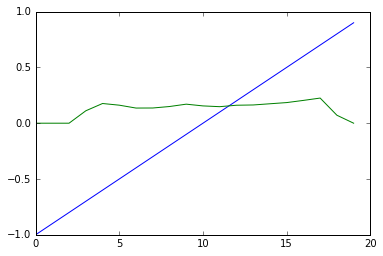

In [45]:
correlation_versus_matches = []
bins = 20
class_size = 2.0/bins
nb_match_per_class = [0]*bins
total_meeting_per_class = [0]*bins

for index, row in data.iterrows():
    if not isnan(row.int_corr):
        if row.match != 0:
            nb_match_per_class[int((row.int_corr+1)/class_size)] += 1.0
        total_meeting_per_class[int((row.int_corr+1)/class_size)] += 1.0

for index, match_per_class in enumerate(nb_match_per_class):
    if(total_meeting_per_class[index])==0:
        correlation_versus_matches.append([float('%.1f'%(-1+index*0.1)),0])
    else:
        correlation_versus_matches.append([float('%.1f'%(-1+index*0.1)),match_per_class/total_meeting_per_class[index]])

# removing an outlier
correlation_versus_matches[1][1] = 0
print(nb_match_per_class)
print(total_meeting_per_class)
print(correlation_versus_matches)

save_tensor(correlation_versus_matches, file_corr_match)
#plt.hist(correlation_versus_matches,bins=bins,range=(-1.0,1.0))
plt.plot(correlation_versus_matches)

In [23]:
# Good format seems to be (attr_0, attr_1, value) -> http://bl.ocks.org/tjdecke/5558084

def group_ages(age):
    res = 0
    if age < 22:
        res = 1
    elif age < 24:
        res = 2
    elif age < 28:
        res = 3
    elif age < 32:
        res = 4
    elif age < 36:
        res = 5
    else:
        res = 6
    return res

def group_fields(field):
    res = 0
    if field in [2,4,5,10,17]:
        return 1
    if field in [11,3]:
        return 2
    if field in [16,6,14,15,7]:
        return 3
    if field in [1]:
        return 4
    if field in [8,13]:
        return 5
    if field in [9]:
        return 6
    if field in [12,18]:
        return 7
    
def group_races(race):
    return race

def compute_correlation_matrix(n_attr1, n_attr2):
    
    if n_attr1 == "field_cd":
        group = group_fields
    elif n_attr1 =="age":
        group = group_ages
    else:
        group = group_races
    
    symmetric = (n_attr1 == n_attr2)
    total_occurence = dict()
    corr_m = dict()
    
    for index, row in data.iterrows():
        if isnan(row.pid):
            break
        #if row.match != 0: 
        person_1 = row
        person_2 = data.query("iid == " + str(row.pid)).iloc[0]
        if not (isnan(person_1[n_attr1]) or isnan(person_2[n_attr2])):
            def append_to_dic(att_1, att_2):               
                person_1_attr_1 = group(person_1[att_1])                
                person_2_attr_2 = group(person_2[att_2])

                if person_1_attr_1 not in corr_m:
                    corr_m[person_1_attr_1] = {}
                if person_1_attr_1 not in total_occurence:
                    total_occurence[person_1_attr_1] = {}
                try:
                    if row.match != 0:
                        if person_1.gender == 0:
                            corr_m[person_1_attr_1][person_2_attr_2] += 1
                        else:
                            corr_m[person_2_attr_2][person_1_attr_1] += 1
                    if person_1.gender == 0:
                        total_occurence[person_1_attr_1][person_2_attr_2] += 1
                    else:
                        total_occurence[person_2_attr_2][person_1_attr_1] += 1
                except:
                    if row.match != 0:
                        if person_1.gender == 0:
                            corr_m[person_1_attr_1][person_2_attr_2] = 1
                        else:
                            corr_m[person_2_attr_2][person_1_attr_1] = 1
                    if person_1.gender == 0:
                        total_occurence[person_1_attr_1][person_2_attr_2] = 1
                    else:
                        total_occurence[person_2_attr_2][person_1_attr_1] = 1
                #if person_1_attr_1 not in total_attr1:
                #    total_attr1[person_1_attr_1] = 0
                #total_attr1[person_1_attr_1] += 1

            append_to_dic(n_attr1, n_attr2)
        #    append_to_dic(n_attr2, n_attr1)
    for idx, att1 in enumerate(corr_m.keys()):
        for att2 in corr_m[att1]:
            corr_m[att1][att2] = corr_m[att1][att2]*100/total_occurence[att1][att2]
    print(total_occurence)
    print(corr_m)
    save_tensor([(att1, att2, val) for att1 in corr_m.keys() for att2, val in corr_m[att1].items()], 
               file_pairwise_corr_match(n_attr1, n_attr2))
                
#compute_correlation_matrix("race", "race")
#compute_correlation_matrix("age", "age")
compute_correlation_matrix("field_cd", "field_cd")
#compute_correlation_matrix("age", "field_cd")



{1: {1: 59, 2: 16, 3: 30, 4: 54, 5: 89, 7: 6}, 2: {1: 77, 2: 32, 3: 39, 4: 151, 5: 238, 7: 20}, 3: {1: 24, 2: 4, 3: 14, 4: 21, 5: 28}, 4: {1: 17, 2: 10, 3: 6, 4: 105, 5: 144, 7: 7}, 5: {1: 36, 2: 6, 3: 16, 4: 54, 5: 79, 7: 2}, 6: {1: 14, 2: 6, 3: 12, 4: 12, 5: 35, 7: 2}, 7: {}}
{1: {1: 23, 3: 20, 4: 14, 5: 13}, 2: {1: 18, 2: 25, 3: 43, 4: 13, 5: 8}, 3: {1: 45, 3: 42, 4: 47, 5: 10}, 4: {1: 23, 3: 100, 4: 34, 5: 16, 7: 28}, 5: {1: 22, 3: 18, 4: 44, 5: 26}, 6: {1: 14, 2: 66, 3: 83, 4: 66, 5: 11}, 7: {}}


In [14]:
# Question 3
# Good format seems to be (attribute, mean_score) -> http://bl.ocks.org/nbremer/6506614

# Attentes des hommes
class Radar:
    def __init__(self, name):
        self.__name__ = name
        self.dic = {"attractive" : 0, "sincerity" : 0,
                    "intelligence" : 0, "fun" : 0,
                    "ambitious" : 0, "same_interests" : 0}
        self.nb_persons  = 0
        
    def add_person(self, person, exp, time):
        saved_dic = self.dic
        try:
            self.dic["attractive"] += int(person["attr{}_{}".format(exp, time)])
            self.dic["sincerity"] += int(person["sinc{}_{}".format(exp, time)])
            self.dic["intelligence"] += int(person["intel{}_{}".format(exp, time)])
            self.dic["fun"] += int(person["fun{}_{}".format(exp, time)])
            self.dic["ambitious"] += int(person["amb{}_{}".format(exp, time)])
            self.dic["same_interests"] += int(person["shar{}_{}".format(exp, time)])
            self.nb_persons  += 1 
        except:    
            self.dic = saved_dic
    
    def compute_mean(self):
        self.dic = {k: v / self.nb_persons for k, v in self.dic.items()}
        
    def save(self):
        self.compute_mean()
        import json
        with open(os.path.join(folder, "{}.json".format(self.__name__)),'w') as fp:
            json.dump(self.dic, fp)


male_expectation = Radar("male_expectation")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 1:
       male_expectation.add_person(row, 1, 1)
male_expectation.save()

female_expectation = Radar("female_expectation")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 0:
       female_expectation.add_person(row, 1, 1)
female_expectation.save()

male_experience = Radar("male_experience")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 0 and row.match == 1:
       male_experience.add_person(row, 1, 3)
male_experience.save() 

female_experience = Radar("female_experience")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 1 and row.match == 1:
       female_experience.add_person(row, 1, 3)
female_experience.save() 

male_own_opninon = Radar("male_own_opninon")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 0:
       male_own_opninon.add_person(row, 4, 3)
male_own_opninon.save() 

female_own_opninon = Radar("female_own_opninon")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 1:
       female_own_opninon.add_person(row, 4, 3)
female_own_opninon.save() 

In [3]:
# Question 4
# TODO... faut qu'on se décide
os.path.realpath('.')

'/Users/Raphael/Documents/Poly/Maitrise_S3/Data_Viz/Projet'